# Importing Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mutual_info_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from skopt import gp_minimize
from skopt.space import Real,Integer,Categorical
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score
import subfunc

Introduction To Project
----------------------------------

The Project is Based on Telco Customer Churn Dataset Publically available on kaggle. Here The project Will perfrom DataCleaning and preprocessing, Visualization, ML Model Building Using the dataset and perform Descriptive, Predictive and Prescriptive Analysis on the dataset. 

The dataset mainly consisists of Data of Customers from an unknown Telco Comapny. Upon Analysing dataset and the intention of its publisher We get to know that THere has been a customer Churn in company that we must find asnwers for.Therefore In order to Move Foreward We can define our Research question as

Research Questions to Be Answered
----------------------------------
What are the main factors that have contributed to customer churn. Does the background of the customer seem have affected for churning. If so what kind of customers are more prone to churn



# Reading DataSet

In [43]:
churn_df_main = pd.read_csv('churn.csv')
churn_df_main.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Displaying Column Details

In [44]:
###################Column Summeries###########################
churn_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The Dataset, upon visual inspection, has 7043 records.From the Result We can see that no column has null values which is a good thing.
It is worth noting that the data type of TotalCharges is Object. It sould be Converted to numerical value

In [45]:
###################Descriptive Statistics of Data###########################
churn_df_main.describe().transpose()
#Note that Senior Citizen is visible but TotalCharges Are not visible(Since Datatype is Object)
#Need to address This in preprocessing

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [46]:
###################Getting and Displaying Number of Unique Values of each Column###########################
for column in churn_df_main.columns:
    print('Column Name: {} <----> Number of Unique Values {}'.format(column,churn_df_main[column].nunique()))
 #customerId Colmun an be removed without further analysis since it offers very little info and has one unique value per each record

Column Name: customerID <----> Number of Unique Values 7043
Column Name: gender <----> Number of Unique Values 2
Column Name: SeniorCitizen <----> Number of Unique Values 2
Column Name: Partner <----> Number of Unique Values 2
Column Name: Dependents <----> Number of Unique Values 2
Column Name: tenure <----> Number of Unique Values 73
Column Name: PhoneService <----> Number of Unique Values 2
Column Name: MultipleLines <----> Number of Unique Values 3
Column Name: InternetService <----> Number of Unique Values 3
Column Name: OnlineSecurity <----> Number of Unique Values 3
Column Name: OnlineBackup <----> Number of Unique Values 3
Column Name: DeviceProtection <----> Number of Unique Values 3
Column Name: TechSupport <----> Number of Unique Values 3
Column Name: StreamingTV <----> Number of Unique Values 3
Column Name: StreamingMovies <----> Number of Unique Values 3
Column Name: Contract <----> Number of Unique Values 3
Column Name: PaperlessBilling <----> Number of Unique Values 2
Co

In [47]:
###################Getting and Displaying Unique Values of each Column###########################
for column in churn_df_main.columns:
    print('Column Name: {} <----> Unique Values: {}'.format(column,churn_df_main[column].unique()))
#Again Need to emphasize that totalCharegs are read as an object instead of a numerical value. Need to solve this

Column Name: customerID <----> Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column Name: gender <----> Unique Values: ['Female' 'Male']
Column Name: SeniorCitizen <----> Unique Values: [0 1]
Column Name: Partner <----> Unique Values: ['Yes' 'No']
Column Name: Dependents <----> Unique Values: ['No' 'Yes']
Column Name: tenure <----> Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column Name: PhoneService <----> Unique Values: ['No' 'Yes']
Column Name: MultipleLines <----> Unique Values: ['No phone service' 'No' 'Yes']
Column Name: InternetService <----> Unique Values: ['DSL' 'Fiber optic' 'No']
Column Name: OnlineSecurity <----> Unique Values: ['No' 'Yes' 'No internet service']
Column Name: OnlineBackup <----> Unique Values: ['Yes' 'No' 'No inte

In [48]:
###################Getting any empty data in training dataset###########################
churn_df_main.isnull().sum()/churn_df_main.shape[0]
# No Empty Data in Original dataset

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

# Basic Data Preprocessing

In [49]:
###################Transformation of totalCharges Column###########################
churn_df_main1 = churn_df_main
churn_df_main1['TotalCharges'] = pd.to_numeric(churn_df_main1['TotalCharges'], errors='coerce')
churn_df_main1.info()
churn_df_main1.to_csv('file1.csv')
#Ouptput reveals the column converted to numeric value
#When Observing the transformed Column there are few missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
#Checking for Null Values
churn_df_main1.isnull().sum()/churn_df_main1.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

After Trasnformation There are null values in TotalCharges Columns as depicted. 

In [51]:
churn_df_main1[churn_df_main1['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since Tenure is zero for these data, can remove them as invalid records. A person must have a tenure in order to be a customer

In [52]:
#Checking for Null Values Again
churn_df_final = churn_df_main1
churn_df_final.dropna(inplace=True)
churn_df_final.isnull().sum()/churn_df_final.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [53]:
#Removing CusotmerId From Final Dataframe
churn_df_final.drop(columns='customerID', inplace=True)


In [54]:
# removing (automatic) from payment method values to make them shorter
churn_df_final['PaymentMethod'] = churn_df_final['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
churn_df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


After these basic Preprocessing Steps We are ready to  Carry out Data Visualization and Start Descriptive Analysis

# Data Visualization

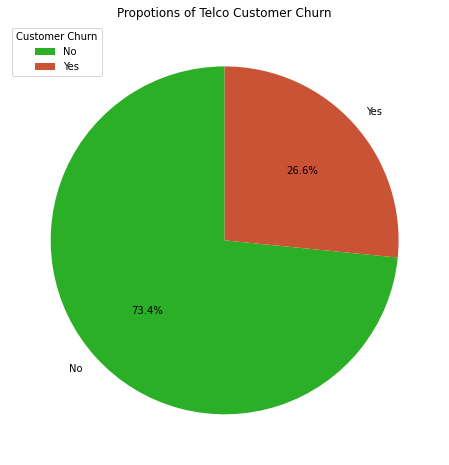

In [55]:
###################Plotting Initial Churn Results###############################
churn_data_counts = churn_df_final['Churn'].value_counts(normalize=True)
churn_data_count_dic = churn_data_counts.to_dict()
churn_data_counts_keys = list(churn_data_count_dic.keys())
churn_data_counts_values = list(churn_data_count_dic.values())
colors=['#2AAF26','#CB5335']

plt.figure(figsize=(8, 8)) 
plt.pie(churn_data_counts_values,labels=churn_data_counts_keys,colors=colors,autopct='%1.1f%%', startangle=90)

plt.title('Propotions of Telco Customer Churn')
plt.legend(title='Customer Churn',loc='upper left')

By Plotting the Churn Column of the dataset, we can see that 26.6%. We can see that there is a class imbalance. This could affect our Analysis specially during predictive analysis phase

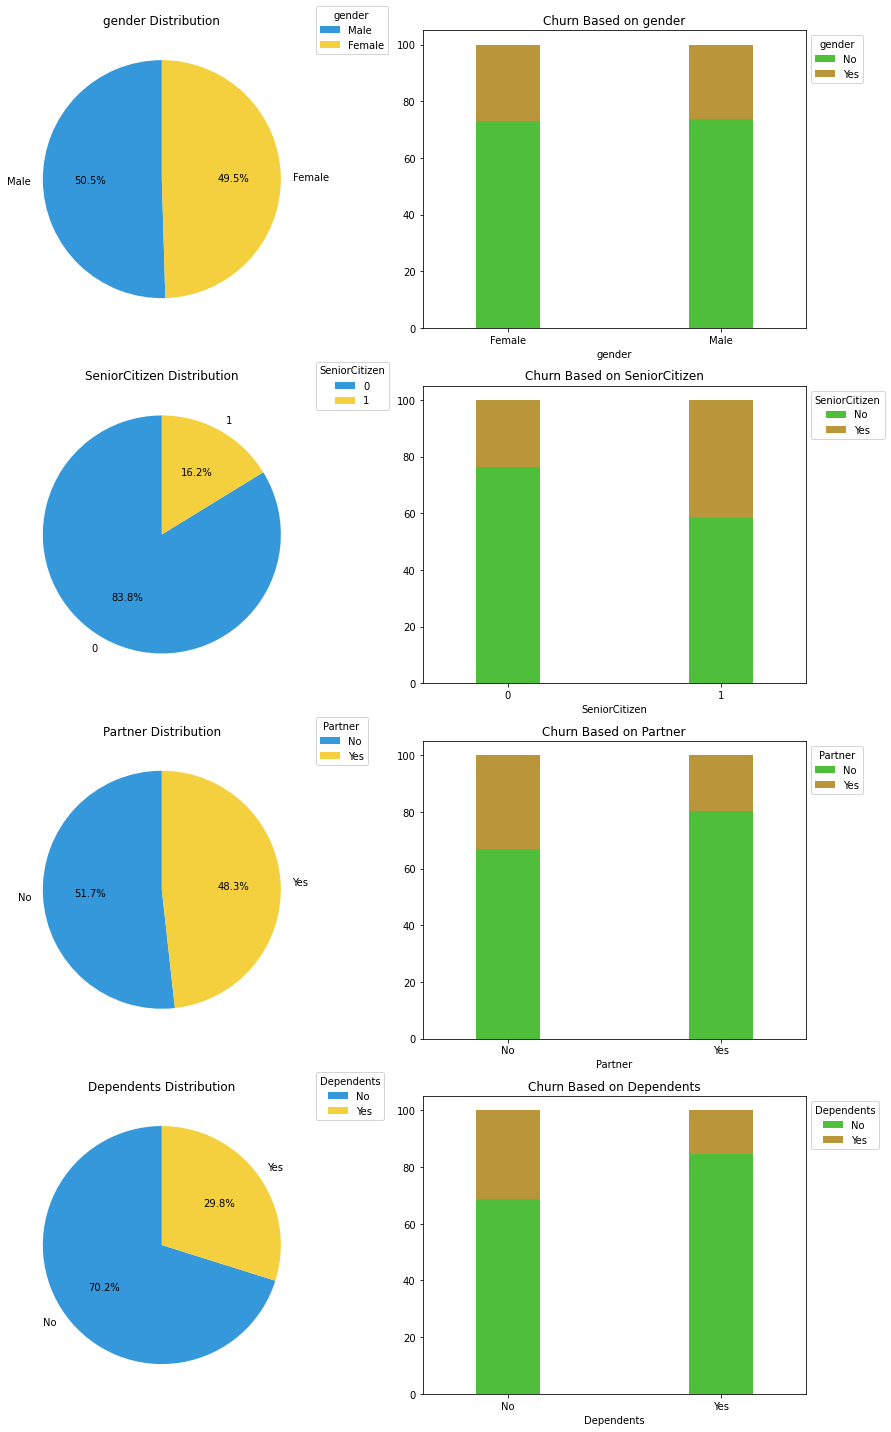

In [56]:
features_demographics_catagorical = ['gender','SeniorCitizen','Partner','Dependents']
subfunc.plot_categorical_churn_info(features_demographics_catagorical,churn_df_final)

Key Notes to Take From Customer Demographic Visualization
-------------------------
1. Churn Rates of Male and Female Are Almost same
2. Senior Citizen Churn Rate is Higher than Non-Senior Citizen Churn rates
3. Customers that do not have a partner or Dependents have higher churn rates than customers that do not have a partner or dependent

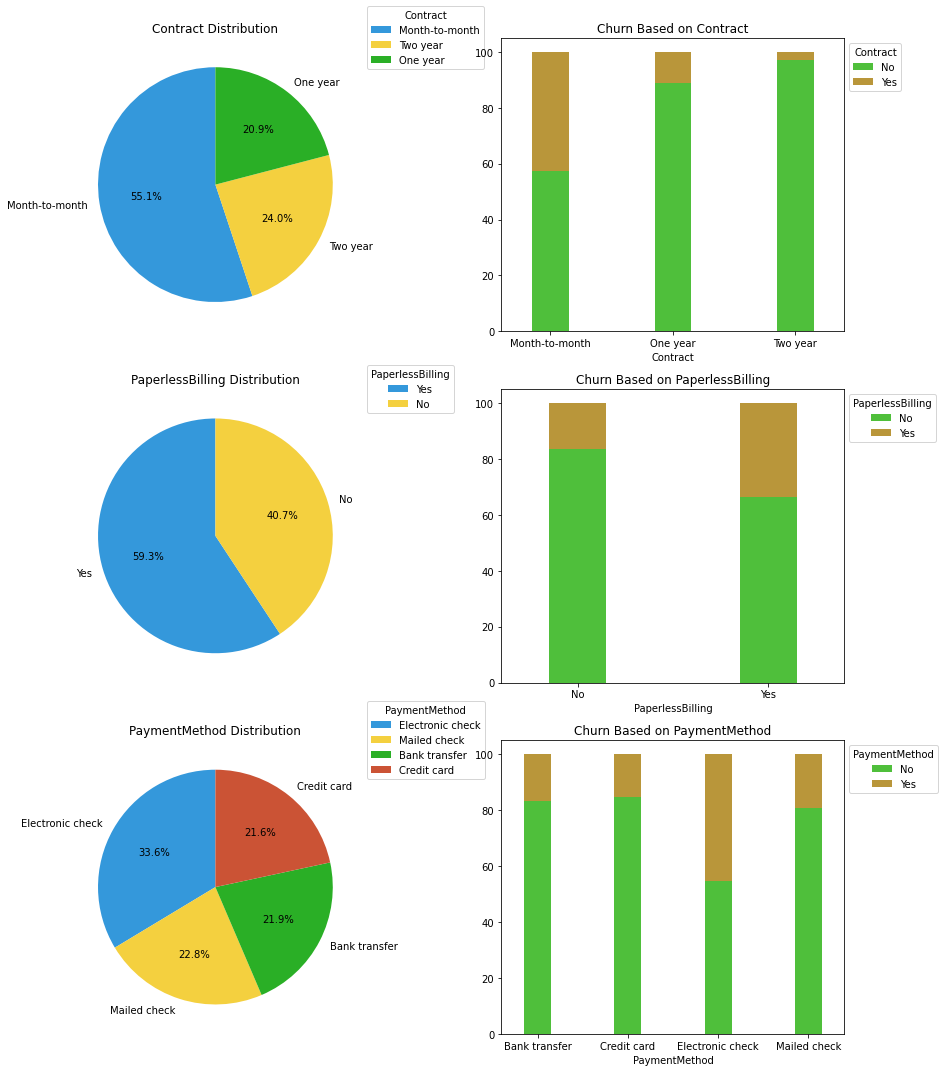

In [57]:
features_account_categorical = ['Contract','PaperlessBilling','PaymentMethod']
subfunc.plot_categorical_churn_info(features_account_categorical,churn_df_final)

Key Notes to Take From Customer Subscription Categorical Details Visualization
-------------------------------------------------------------------

1. Churn On Month to month Contract seems to be much higher than other contracts
2. Customers that have got paperless billing have much higher churn rate than those who have not
3. Customers who does Payment Using Electronic Check have considerable high Churn rates than others

#############################Customer Account Details################################

tenure
MonthlyCharges
TotalCharges


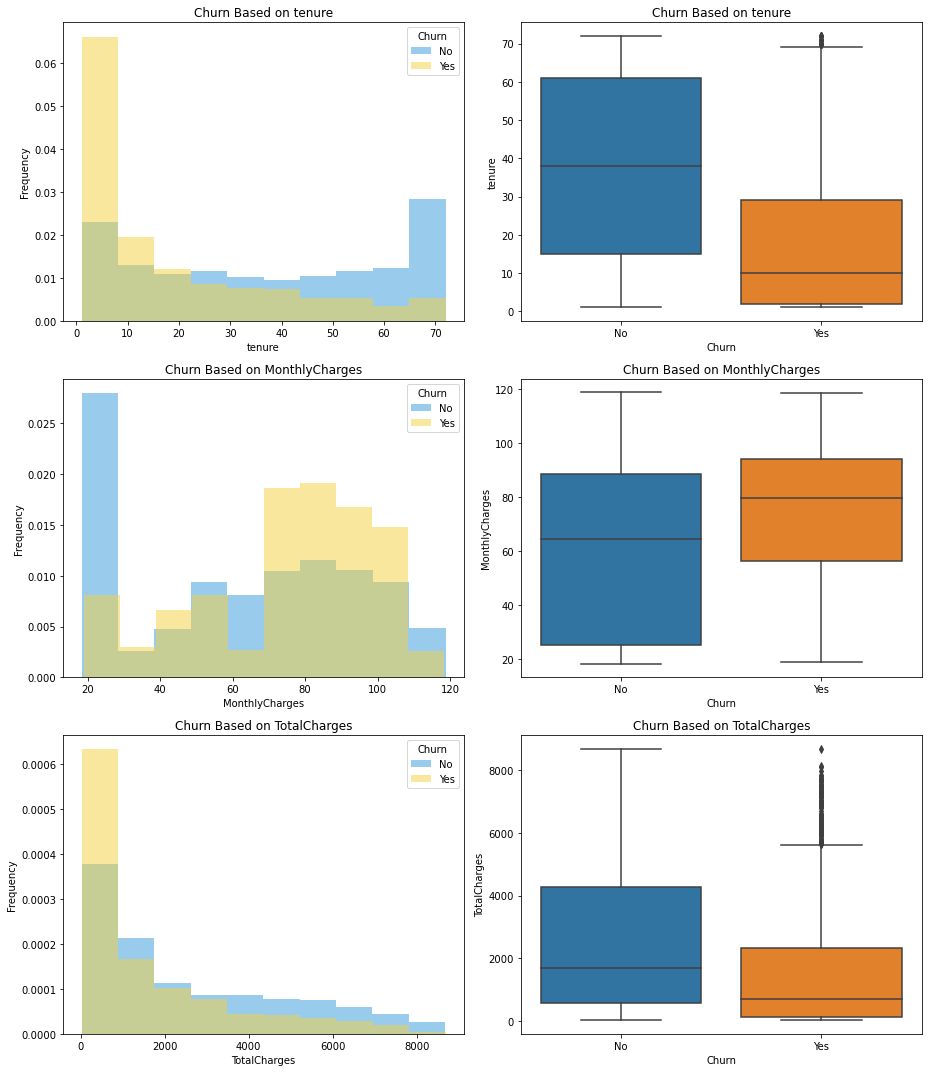

In [58]:
features_account_numerical = ['tenure','MonthlyCharges','TotalCharges']
subfunc.plot_numerical_churn_info(features_account_numerical,churn_df_final)

Key Notes to Take From Customer Subscription Nuemrical Details Visualization
----------------------------
1. Churned customers have lower tenure with a median around 10 months compared to a median of non-churners around 38 months.It seems The company can't keep its new customers which is a very bad thing to happen
2. Churned customers had higher monthly charges with a median around 80(USD) and much lower interquartile range than that of non-churning customers which only have a median around 65(USD).
3. Clients with more total Charges Have a lower Chance of leaving the company

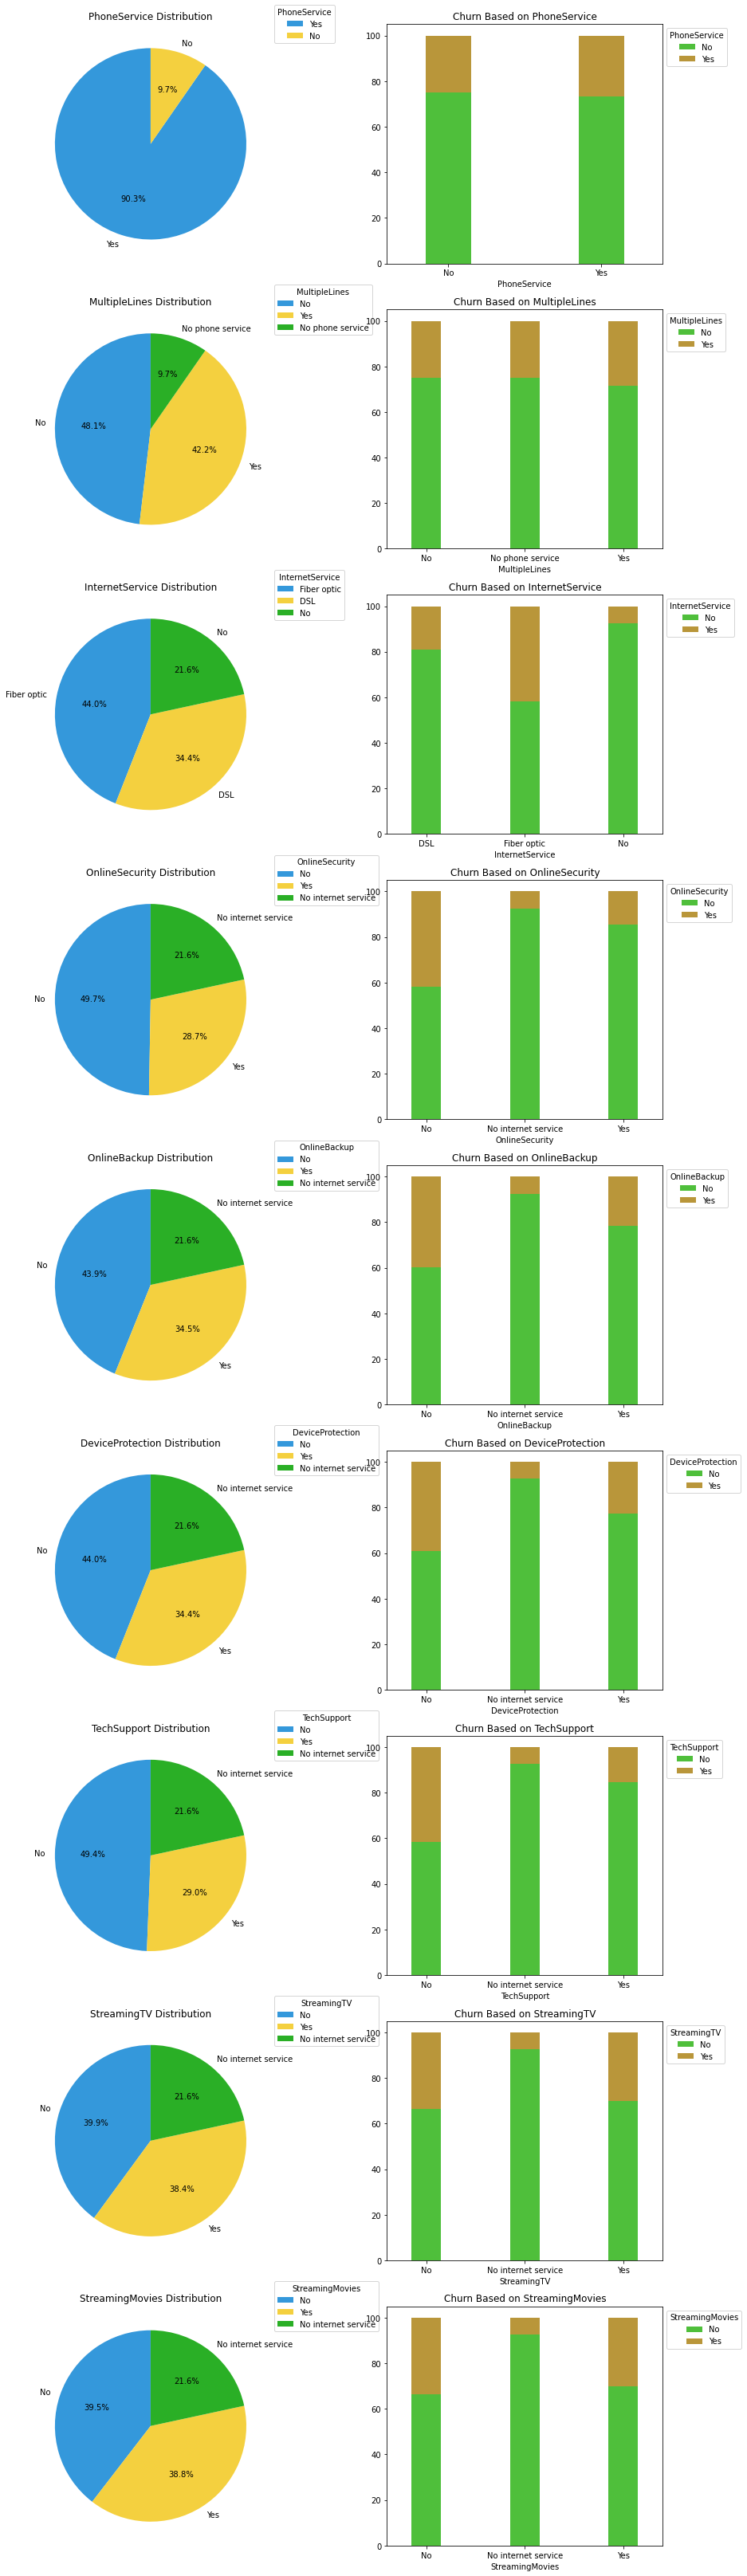

In [59]:
features_service_categorical = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
subfunc.plot_categorical_churn_info(features_service_categorical,churn_df_final)

Key Notes to Take From Customer Service Details Visualization
----------------------------------------------------

1. Customers with Online Security services have online security service have less churn rate comapred to clients that Do not have online Security Service
2. Customers with no tech support have a higher churn rate
3. Phone Service attribute like PhoneService and MultipleLines does not seems to have a huge impact on churn
4. Fiber Optic Internet Service Customers seems to have a very high curn rate at almost 50%

# Feature Importance and Feature Engineering



Before Moving On  We need to do additional processing and feature Engineering So we can perform predictions on this dataset

In [60]:
# Building a function to compute the mutual infomation score between a categorical varaible and churn column
def compute_mutual_information(categorical_features):
    return mutual_info_score(categorical_features, churn_df_final.Churn)

#Selecting the relevent Categorical Variable
categorical_variables = churn_df_final.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information scor
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

#feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


Key Notes to Take From Feature Importance
----------------------------------------------------

1. gender, MultipleLines and PhoneService Features do not have much contribution towards churn

In [61]:
#Dropping Columns that have feature important less than 0.01
churn_df_final.drop(['MultipleLines','PhoneService','gender'], axis=1, inplace=True)
churn_df_final.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now We Preform Encoding

In [62]:
#Applying label encoding for binary variables

churn_df_final_trans = churn_df_final.copy()
label_encoding_cols = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']

for col in label_encoding_cols:
    if col == 'gender':
        churn_df_final_trans[col] = churn_df_final_trans[col].map({'Female': 0, 'Male': 1})
    else: 
        churn_df_final_trans[col] = churn_df_final_trans[col].map({'No': 0,'Yes': 1}) 
        
churn_df_final_trans.head(30)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,0,0,1,22,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card,89.10,1949.40,0
7,0,0,0,10,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,1,0,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,0,0,1,62,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer,56.15,3487.95,0


In [63]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

churn_df_final_trans = pd.get_dummies(churn_df_final_trans, columns = one_hot_encoding_cols)

churn_df_final_trans.head(30)


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,0,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,99.65,820.50,1,0,1,...,0,0,1,1,0,0,0,0,1,0
6,0,0,1,22,1,89.10,1949.40,0,0,1,...,1,0,0,1,0,0,0,1,0,0
7,0,0,0,10,0,29.75,301.90,0,1,0,...,1,0,0,1,0,0,0,0,0,1
8,0,1,0,28,1,104.80,3046.05,1,0,1,...,0,0,1,1,0,0,0,0,1,0
9,0,0,1,62,0,56.15,3487.95,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [64]:
# Performing Normalization on tenure, MonthlyCharges and TotalCharges

cols_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in cols_to_normalize:
    min_val = churn_df_final_trans[col].min()
    max_val = churn_df_final_trans[col].max()
    churn_df_final_trans[col] = (churn_df_final_trans[col] - min_val) / (max_val - min_val)   


#Final Transformed Data after normalization
churn_df_final_trans.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,1,0.115423,0.001275,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,0,0.385075,0.215867,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0.354229,0.010310,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0.239303,0.210241,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0.521891,0.015330,1,0,1,...,1,0,0,1,0,0,0,0,1,0


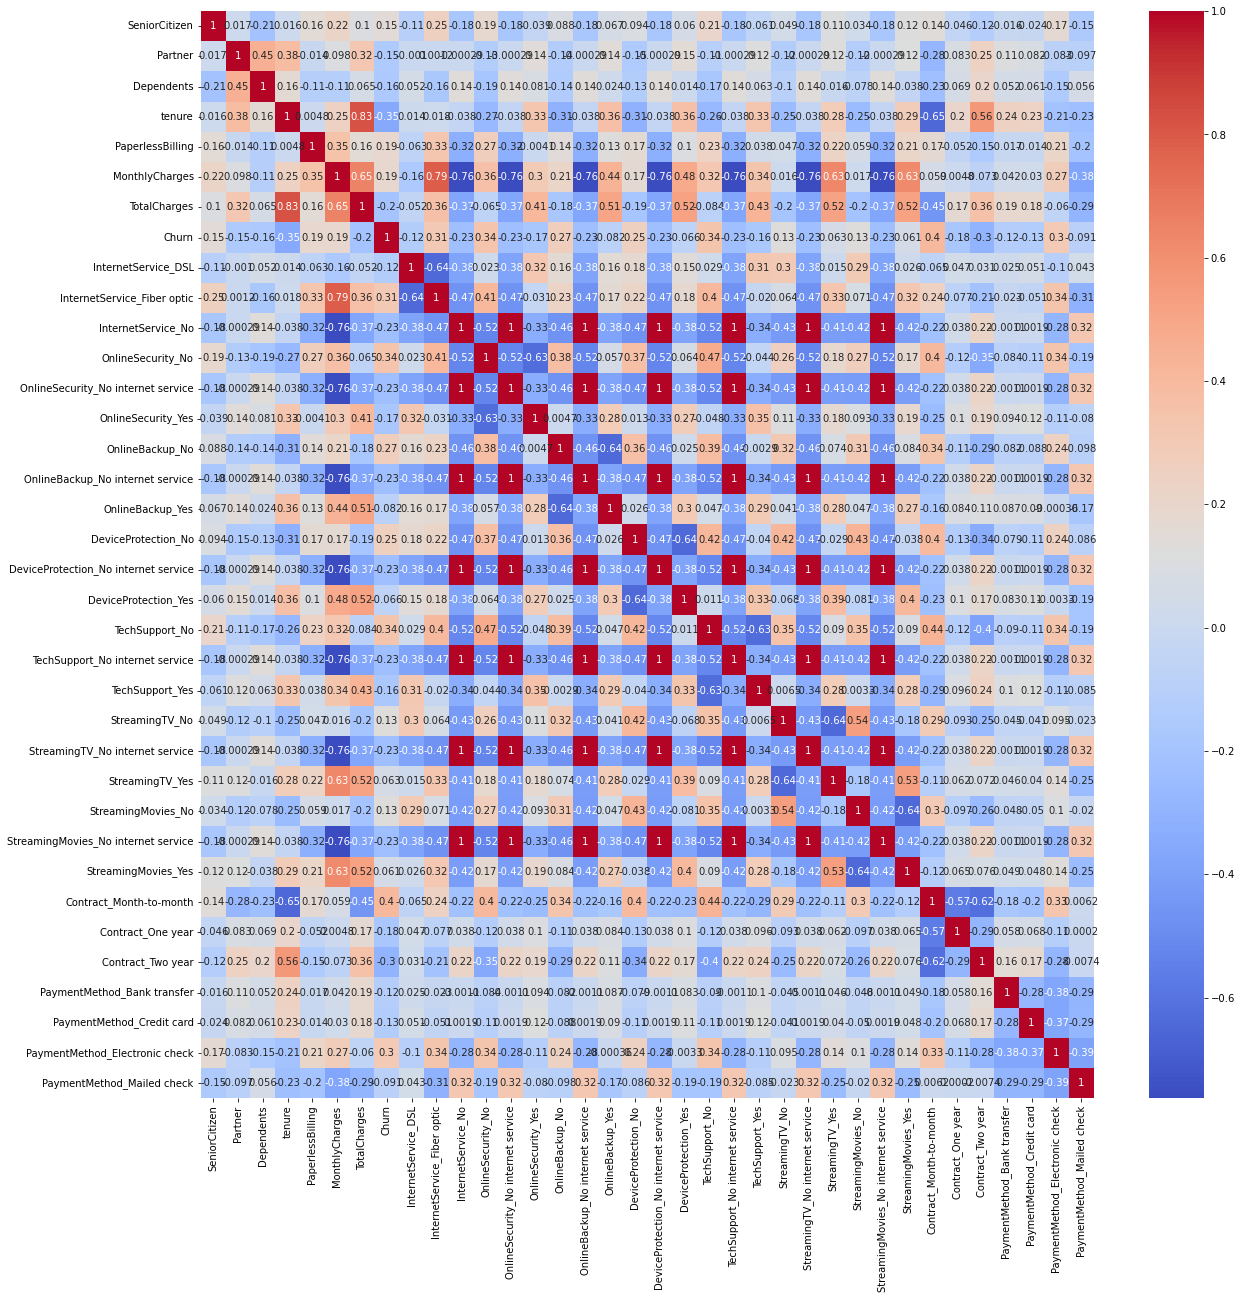

In [65]:
#Before Moving To Predictions, Checking on Correlation

# Calculating the pairwise correlation
corr_mat = churn_df_final_trans.corr()

#plotting
plt.figure(figsize=(20, 20)) 
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
plt.show()

#Need to drop unwanted Columns to reduce redundancies

In [66]:
churn_df_final_trans.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')

In [67]:
#Dropping Redundant Columns
churn_df_final_trans.drop(['InternetService_DSL','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service','Contract_Two year','PaymentMethod_Mailed check'], axis=1, inplace=True)

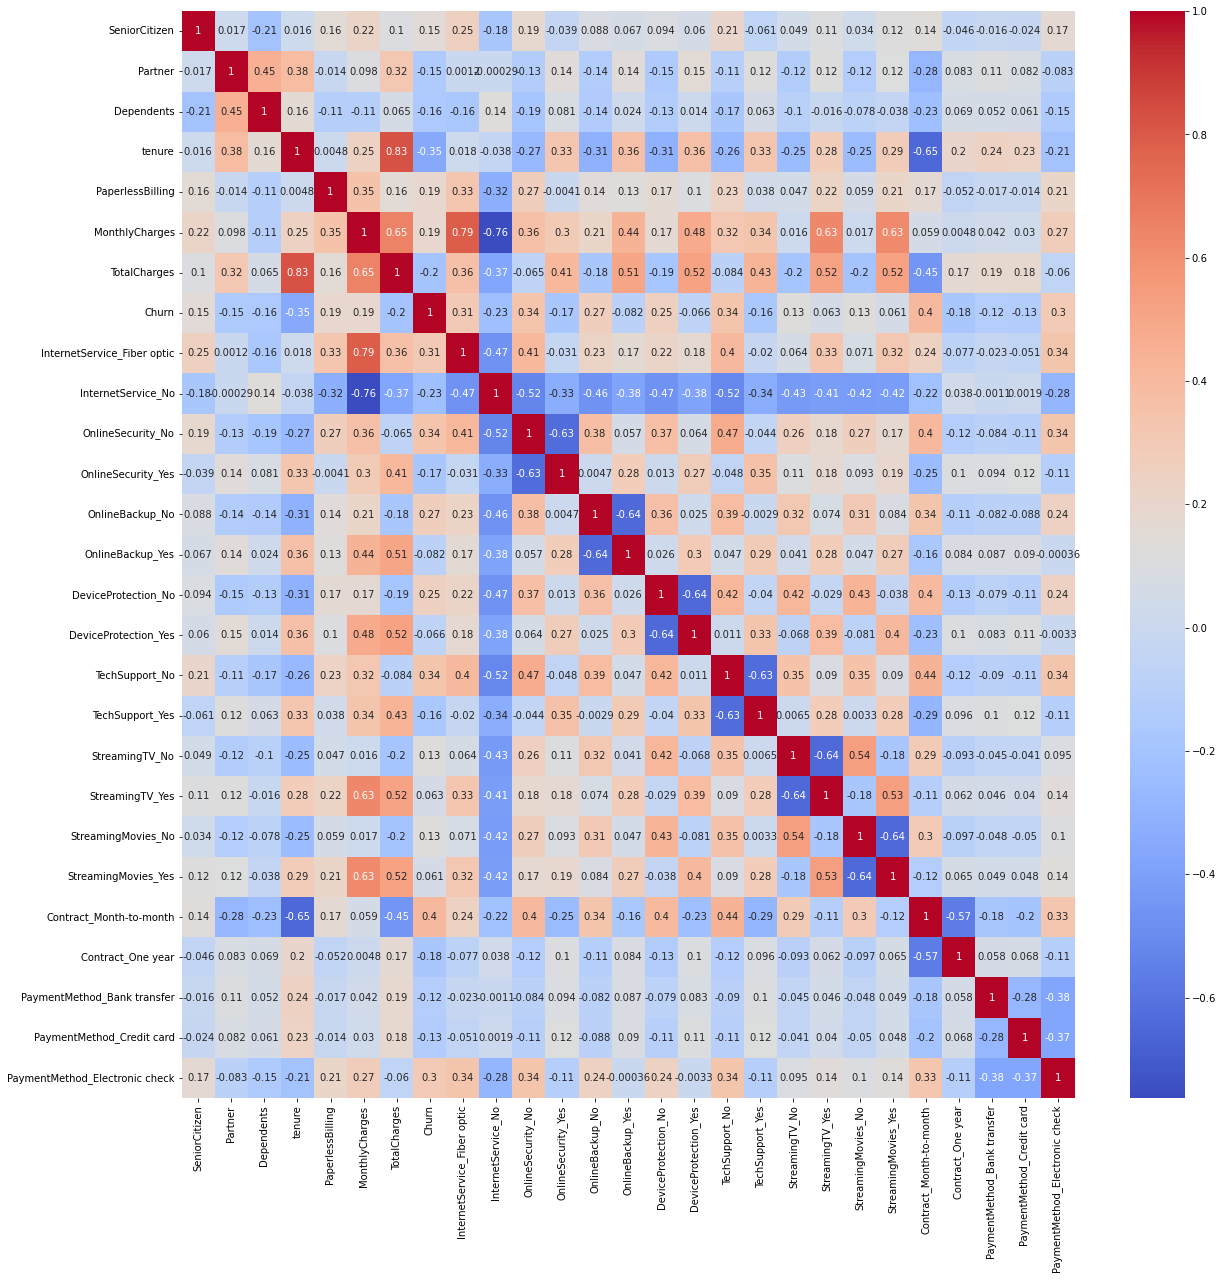

In [68]:
#Before Moving To Predictions, Checking on Correlation statistics again to make sure Unnecessary dependenices are left

# Calculating the pairwise correlation
corr_mat = churn_df_final_trans.corr()

#plotting
plt.figure(figsize=(20, 20)) 
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
plt.show()

<AxesSubplot:>

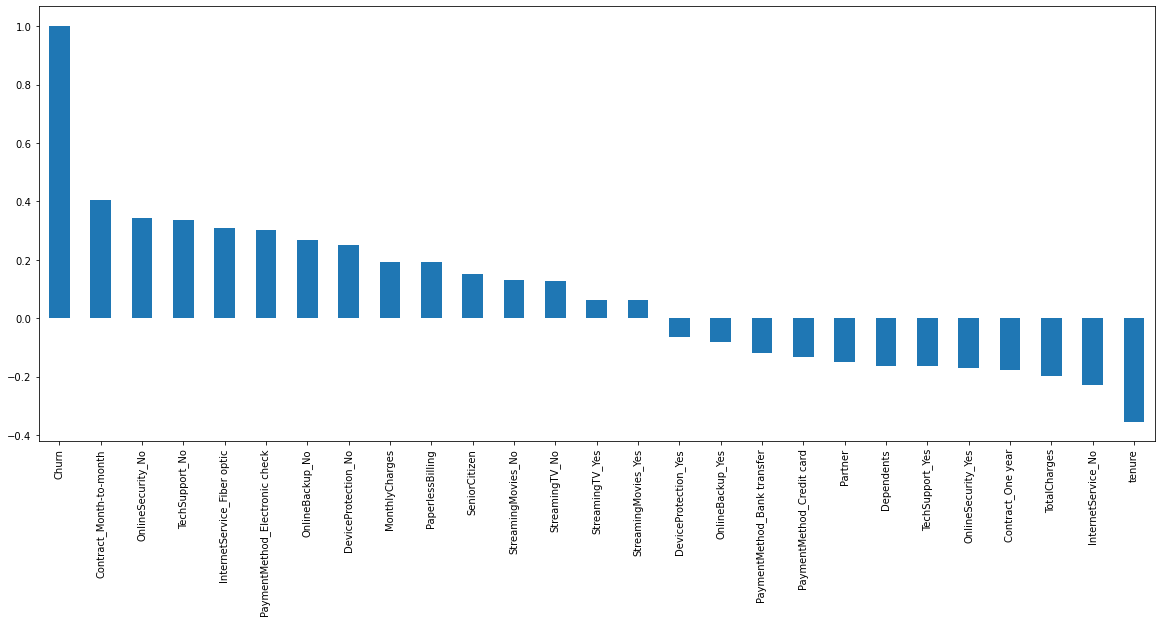

In [69]:
#Correlation of Churn With Each Features
plt.figure(figsize=(12,10))
churn_df_final_trans.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,8))

Key Notes to Take From Correlation Values
----------------------------------------------------

1. After encoding, Contract_Month_to_Month,Online_Security_No, TechSupport_No,InernetService_FiberOptic have good postive Corrleations with churn
2. After encoding,Tenure and InternetService_No have good Corelations with Churn

Data Is Now Ready to Be uesd for predictions

# Classifier Training and Test Set Classification

Here we are evaluating few classfiers based on their accuracy on testing set to find the most suitable classifier to predict customer churen from future customer data
The classfiers are optimized by hypaerparameter tuining using bayesian optimization and each of their best version is taken for comparison 
The type of classfiers we are considering are
1. Linear Regression Classfier
2. KNN Classifier
3. SVM Classifier
4. Decision Tree Classfier
5. Random Forest Classifier

Dividing Data To Train and Test

In [70]:
X = churn_df_final_trans.drop(['Churn'],axis=1)
y = churn_df_final_trans['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, shuffle=True)

In [71]:
##########################Logistic Regression Classifier#########################################
search_space=[Real(0.001, 100, prior='log-uniform', name='C'),Categorical(['l2'], name='penalty'),
             Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], name='solver')]

@use_named_args(search_space)
def build_logreg_classifier(C, penalty, solver):
    # Create a logistic regression model with the given parameters
    clf = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
    # Fit the model on the training data
    clf.fit(X_train, y_train)
    # Compute the validation accuracy
    val_acc = clf.score(X_test, y_test)
    return -val_acc

# Run Bayesian optimization
result = gp_minimize(build_logreg_classifier,search_space,n_calls=50, random_state=42,verbose=True)

# Print best hyperparameters and corresponding validation accuracy
print(f'Best logistic regression hyperparameters: {result.x}')
print(f'Best validation accuracy: {-result.fun}')

# Train logistic regression with best hyperparameters on full training set
clf_lr = LogisticRegression(C=result.x[0],penalty=result.x[1],solver=result.x[2],max_iter=1000,random_state=42)
clf_lr.fit(X_train, y_train)

# Evaluate logistic regression on test set
y_pred_lr = clf_lr.predict(X_test)
test_acc_lr = accuracy_score(y_test, y_pred_lr)
print(f'Test set accuracy: {test_acc_lr:.6f}')

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3379
Function value obtained: -0.7929
Current minimum: -0.7929
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0369
Function value obtained: -0.7941
Current minimum: -0.7941
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0160
Function value obtained: -0.7935
Current minimum: -0.7941
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1247
Function value obtained: -0.7941
Current minimum: -0.7941
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.3255
Function value obtained: -0.7929
Current minimum: -0.7941
Iteration No: 6 started. 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.4448
Function value obtained: -0.7929
Current minimum: -0.7941
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 1.4372
Function value obtained: -0.7924
Current minimum: -0.7941
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4508
Function value obtained: -0.7867
Current minimum: -0.7941
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.4777
Function value obtained: -0.7924
Current minimum: -0.7941
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.4747
Function value obtained: -0.7929
Current minimum: -0.7941
Iteration No: 46 st

In [72]:
##########################SVM Classifier#########################################
search_space = [
    Categorical(['linear', 'rbf'], name='kernel'),
    Real(1e-6, 1e+2, prior='log-uniform', name='C'),
    Real(1e-6, 1e+2, prior='log-uniform', name='gamma')
]

# Define objective function to optimize
@use_named_args(search_space)
def objective(**params):
    clf = SVC(**params, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    # Return the negative mean cross-validation score as the objective to minimize
    return -np.mean(scores)

# Run Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=50, random_state=42,verbose=True)

# Print best hyperparameters and corresponding validation accuracy
print(f'Best SVM hyperparameters: {result.x}')
print(f'Best validation accuracy: {-result.fun}')

# Train SVM with best hyperparameters on full training set
clf_svm = SVC(**{param.name: value for param, value in zip(search_space, result.x)}, random_state=42)
clf_svm.fit(X_train, y_train)

# Evaluate SVM on test set
y_pred_svm = clf_svm.predict(X_test)
test_acc_svm = accuracy_score(y_test, y_pred_svm)
print(f'Test set accuracy: {test_acc_svm:.6f}')

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.8587
Function value obtained: -0.7325
Current minimum: -0.7325
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.8966
Function value obtained: -0.7325
Current minimum: -0.7325
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4917
Function value obtained: -0.7325
Current minimum: -0.7325
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.8534
Function value obtained: -0.7325
Current minimum: -0.7325
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.2487
Function value obtained: -0.7325
Current minimum: -0.7325
Iteration No: 6 started. 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 1.4561
Function value obtained: -0.8007
Current minimum: -0.8007
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 1.4322
Function value obtained: -0.8005
Current minimum: -0.8007
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.4940
Function value obtained: -0.8005
Current minimum: -0.8007
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 1.4252
Function value obtained: -0.8005
Current minimum: -0.8007
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 1.4661
Function value obtained: -0.8003
Current minimum: -0.8007
Iteration No: 46 st

In [73]:
##########################KNN Classifier#########################################
search_space = [Integer(1, 20, name='n_neighbors'),Categorical(['uniform', 'distance'], name='weights'),
                Integer(1, 2, name='p')]

@use_named_args(search_space)
def build_knn_classifier(n_neighbors, weights, p):
    # Create a KNN model with the given parameters
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p, n_jobs=-1)
    # Fit the model on the training data
    scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    # Return the negative mean cross-validation score as the objective to minimize
    return -np.mean(scores)

# Run Bayesian optimization
result = gp_minimize(build_knn_classifier,search_space ,n_calls=50, random_state=42,verbose=True)

# Print best hyperparameters and corresponding validation accuracy
print(f'Best KNN hyperparameters: {result.x}')
print(f'Best validation accuracy: {-result.fun}')

# Train KNN with best hyperparameters on full training set
clf_knn = KNeighborsClassifier(n_neighbors=result.x[0], weights=result.x[1], p=result.x[2], n_jobs=-1)
clf_knn.fit(X_train, y_train)

# Evaluate KNN on test set
y_pred_knn = clf_knn.predict(X_test)
test_acc_knn = accuracy_score(y_test, y_pred_knn)
print(f'Test set accuracy: {test_acc_knn:.6f}')

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2015
Function value obtained: -0.7772
Current minimum: -0.7772
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2094
Function value obtained: -0.7719
Current minimum: -0.7772
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2055
Function value obtained: -0.7706
Current minimum: -0.7772
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1995
Function value obtained: -0.7734
Current minimum: -0.7772
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2374
Function value obtained: -0.7799
Current minimum: -0.7799
Iteration No: 6 started. 

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.5037
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.4608
Function value obtained: -0.7897
Current minimum: -0.7916
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.3949
Function value obtained: -0.7755
Current minimum: -0.7916
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.4029
Function value obtained: -0.7871
Current minimum: -0.7916
Iteration No: 17 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.4897
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.4807
Function value obtained: -0.7632
Current minimum: -0.7916
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.5106
Function value obtained: -0.7873
Current minimum: -0.7916
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.4747
Function value obtained: -0.7905
Current minimum: -0.7916
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.4678
Function value obtained: -0.7810
Current minimum: -0.7916
Iteration No: 22 st

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 0.5106
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.4677
Function value obtained: -0.7859
Current minimum: -0.7916
Iteration No: 31 started. Searching for the next optimal point.
Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.4747
Function value obtained: -0.7751
Current minimum: -0.7916
Iteration No: 32 started. Searching for the next optimal point.
Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.5336
Function value obtained: -0.7664
Current minimum: -0.7916
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.5465
Function value obtained: -0.7854
Current minimum: -0.7916
Iteration No: 34 st

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.5445
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 36 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.5565
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 37 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.5854
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 38 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.5707
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 39 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.6143
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 40 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.5705
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 41 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.5705
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.5595
Function value obtained: -0.7765
Current minimum: -0.7916
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.6293
Function value obtained: -0.7672
Current minimum: -0.7916
Iteration No: 44 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.6124
Function value obtained: -0.7916
Current minimum: -0.7916
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.5765
Function value obtained: -0.7289
Current minimum: -0.7916
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.6283
Function value obtained: -0.7793
Current minimum: -0.7916
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 0.5844
Function value obtained: -0.7655
Current minimum: -0.7916
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.6233
Function value obtained: -0.7776
Current minimum: -0.7916
Iteration No: 49 st

In [74]:
##########################Decision Tree Classifier#########################################
search_space = [Integer(1, 20, name='max_depth'),Integer(2, 50, name='min_samples_split'),
                Categorical(['gini', 'entropy'], name='criterion')]

@use_named_args(search_space)
def build_dt_classifier(max_depth, min_samples_split, criterion):
    # Create a decision tree model with the given parameters
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion, random_state=42)
    # Fit the model on the training data
    scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    # Return the negative mean cross-validation score as the objective to minimize
    return -np.mean(scores)

# Run Bayesian optimization
result = gp_minimize(build_dt_classifier, search_space, n_calls=50, random_state=42, verbose=True)

# Print best hyperparameters and corresponding validation accuracy
print(f'Best decision tree hyperparameters: {result.x}')
print(f'Best validation accuracy: {-result.fun}')

# Train decision tree with best hyperparameters on full training set
clf_dt = DecisionTreeClassifier(max_depth=result.x[0], min_samples_split=result.x[1], criterion=result.x[2], random_state=42)
clf_dt.fit(X_train, y_train)

# Evaluate decision tree on test set
y_pred_dt = clf_dt.predict(X_test)
test_acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Test set accuracy: {test_acc_dt:.6f}')

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0309
Function value obtained: -0.7512
Current minimum: -0.7512
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0309
Function value obtained: -0.7666
Current minimum: -0.7666
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0349
Function value obtained: -0.7744
Current minimum: -0.7744
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0329
Function value obtained: -0.7435
Current minimum: -0.7744
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0299
Function value obtained: -0.7349
Current minimum: -0.7744
Iteration No: 6 started. 

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.3700
Function value obtained: -0.7893
Current minimum: -0.7893
Iteration No: 15 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.3740
Function value obtained: -0.7893
Current minimum: -0.7893
Iteration No: 16 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.2922
Function value obtained: -0.7893
Current minimum: -0.7893
Iteration No: 17 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.2982
Function value obtained: -0.7893
Current minimum: -0.7893
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.4348
Function value obtained: -0.7899
Current minimum: -0.7899
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.3201
Function value obtained: -0.7895
Current minimum: -0.7899
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.2902
Function value obtained: -0.7674
Current minimum: -0.7899
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.4018
Function value obtained: -0.7952
Current minimum: -0.7952
Iteration No: 22 st

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.4009
Function value obtained: -0.7966
Current minimum: -0.7966
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.4428
Function value obtained: -0.7916
Current minimum: -0.7966
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.4398
Function value obtained: -0.7888
Current minimum: -0.7966
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.4069
Function value obtained: -0.7962
Current minimum: -0.7966
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.4213
Function value obtained: -0.7931
Current minimum: -0.7966
Iteration No: 38 st

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.4239
Function value obtained: -0.7966
Current minimum: -0.7966
Iteration No: 39 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.3929
Function value obtained: -0.7966
Current minimum: -0.7966
Iteration No: 40 started. Searching for the next optimal point.
Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.4358
Function value obtained: -0.7759
Current minimum: -0.7966
Iteration No: 41 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.4588
Function value obtained: -0.7966
Current minimum: -0.7966
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.4428
Function value obtained: -0.7840
Current minimum: -0.7966
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4299
Function value obtained: -0.7801
Current minimum: -0.7966
Iteration No: 44 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.4289
Function value obtained: -0.7966
Current minimum: -0.7966
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.4907
Function value obtained: -0.7755
Current minimum: -0.7966
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.4548
Function value obtained: -0.7431
Current minimum: -0.7966
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 0.4508
Function value obtained: -0.7799
Current minimum: -0.7966
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.4508
Function value obtained: -0.7801
Current minimum: -0.7966
Iteration No: 49 st

In [75]:
##########################Random Forest Classifier#########################################
search_space = [
    Integer(50, 500, name='n_estimators'),
    Integer(1, 1000, name='max_depth'),
    Integer(2, 10, name='min_samples_split'),
    Integer(1, 10, name='min_samples_leaf'),
    Categorical(['gini', 'entropy'], name='criterion'),
    Integer(1, X_train.shape[1], name='max_features')
]


@use_named_args(search_space)
def build_rf_classifier(n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion, max_features):
    # Create a Random Forest model with the given parameters
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, criterion=criterion,
                                  max_features=max_features, n_jobs=-1, random_state=42)
    # Fit the model on the training data
    scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    # Return the negative mean cross-validation score as the objective to minimize
    return -np.mean(scores)

# Run Bayesian optimization
result = gp_minimize(build_rf_classifier, search_space, n_calls=50, random_state=42, verbose=True)

# Print best hyperparameters and corresponding validation accuracy
print(f'Best Random Forest hyperparameters: {result.x}')
print(f'Best validation accuracy: {-result.fun}')

# Train Random Forest with best hyperparameters on full training set
clf_rf = RandomForestClassifier(n_estimators=result.x[0], max_depth=result.x[1], 
                                 min_samples_split=result.x[2], min_samples_leaf=result.x[3], 
                                 criterion=result.x[4], max_features=result.x[5], 
                                 n_jobs=-1, random_state=42)
clf_rf.fit(X_train, y_train)

# Evaluate Random Forest on test set
y_pred_rf = clf_rf.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Test set accuracy: {test_acc_rf:.6f}')

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0472
Function value obtained: -0.8015
Current minimum: -0.8015
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.5499
Function value obtained: -0.8030
Current minimum: -0.8030
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.7839
Function value obtained: -0.7325
Current minimum: -0.8030
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.2084
Function value obtained: -0.7939
Current minimum: -0.8030
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.6423
Function value obtained: -0.8002
Current minimum: -0.8030
Iteration No: 6 started. 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 1.5469
Function value obtained: -0.8009
Current minimum: -0.8039
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 2.4300
Function value obtained: -0.7922
Current minimum: -0.8039
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 2.1193
Function value obtained: -0.8013
Current minimum: -0.8039
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 1.0452
Function value obtained: -0.7973
Current minimum: -0.8039
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 2.0994
Function value obtained: -0.7969
Current minimum: -0.8039
Iteration No: 46 st

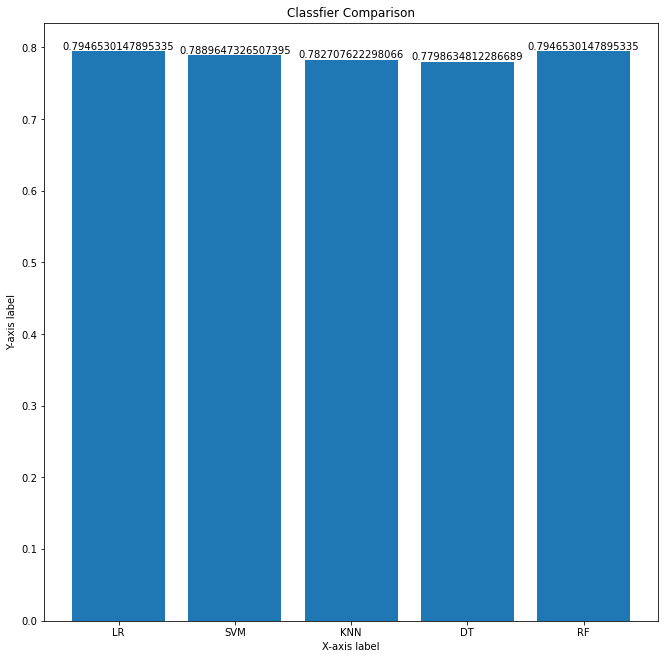

In [76]:
clf_name_arr = ["LR","SVM","KNN","DT","RF"]
clf_acc_arr = [test_acc_lr,test_acc_svm,test_acc_knn,test_acc_dt,test_acc_rf]


plt.figure(figsize=(11,11))
plt.bar(clf_name_arr, clf_acc_arr)
plt.xticks(clf_name_arr, clf_name_arr)

for i, v in enumerate(clf_acc_arr):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Add axis labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Classfier Comparison')

# Show the plot
plt.show()

We can see that All the classifiers have almost same accuracy. THerefore we will select the most simple one from them which is the linear regression

In [77]:
#Confusion Matrix for Logistic Regression Classifier
confusion_mat = confusion_matrix(y_test, y_pred_lr)
print("Confusion matrix:\n", confusion_mat)


Confusion matrix:
 [[1153  147]
 [ 214  244]]


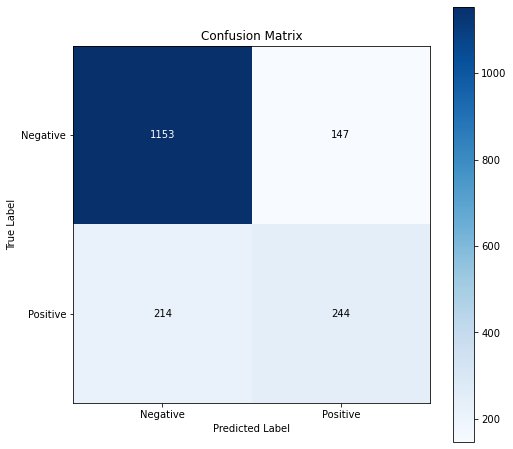

In [78]:

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,8))
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.yticks(np.arange(2), ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the counts to the heatmap
thresh = confusion_mat.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='white' if confusion_mat[i, j] > thresh else 'black')
        
# Add a title
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [79]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.53      0.57       458

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



Here we can see that we have good figures for precision. For class zero the recall is 0.89 which is very good but for class 1 the recall is 0.53 which could be better. This means the classfier excels in identifying Non Churning customers(A prediction can be 89% correct) but could get some fine tuning in predicting customers who will churn in the future(If a person is detected as a churining person, the probability of this person actually churning is only 53%). This is due to Class imbalance that we discussed in earlier 

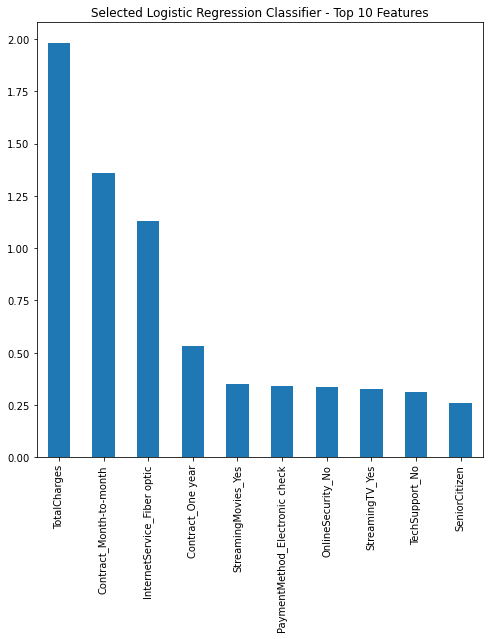

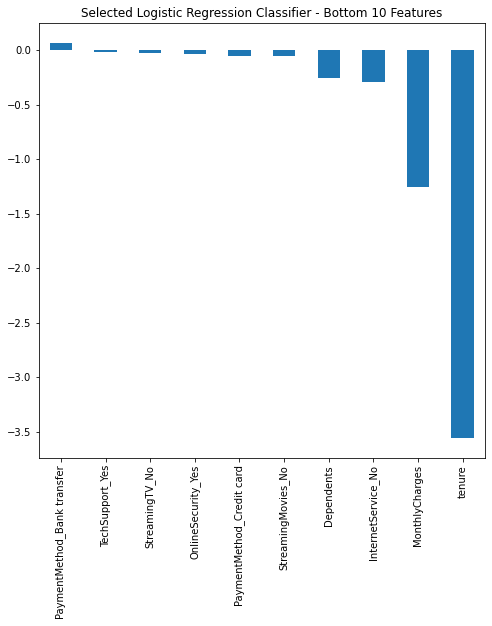

In [80]:
def plot_feature_weights(X,clf,clf_name):
    weights = pd.Series(clf.coef_[0],index=X.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(8,8))
    plt.tick_params(labelsize=10)
    plt.title(f'{clf_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(8,8))
    plt.tick_params(labelsize=10)
    plt.title(f'{clf_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

plot_feature_weights(X,clf_lr,"Selected Logistic Regression Classifier")

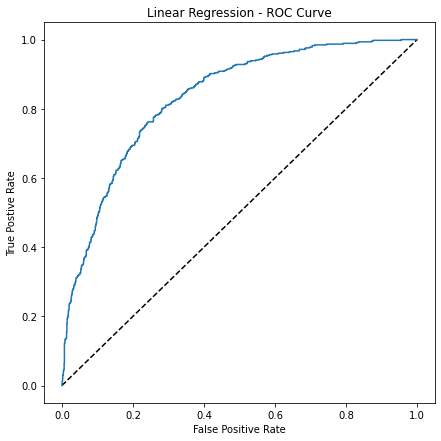

AUC Score (ROC): 0.8319541484716159



In [81]:
def plot_roc_curve_auc_score(X_test,y_test,y_pred_proba,clf_name):
    
    y_pred_prob = y_pred_proba[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    
    plt.figure(figsize=(7,7))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'{clf_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postive Rate')
    plt.title(f'{clf_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test,y_pred_prob)}\n')

y_pred_lr_prob = clf_lr.predict_proba(X_test)
plot_roc_curve_auc_score(X_test,y_test,y_pred_lr_prob,"Linear Regression")


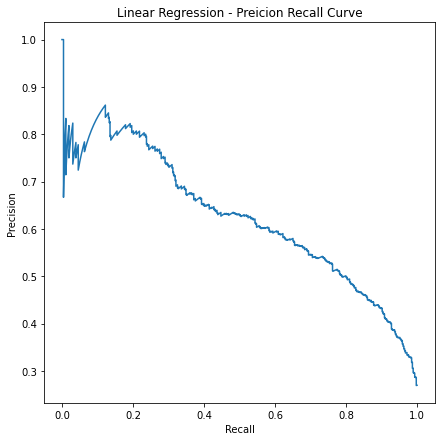

F1 Score 0.574793875147232 
AUC Score: 0.6242637417281836


In [82]:
def plot_precision_recall_curve_and_scores(X_test,y_test,y_pred,y_pred_proba,clf_name):
    
    y_pred_prob = y_pred_proba[:,1]
    precision,recall,thresholds = precision_recall_curve(y_test,y_pred_prob)
        
    plt.figure(figsize=(7,7))
    plt.plot(recall,precision,label=f'{clf_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{clf_name} - Preicion Recall Curve')
    plt.show()
    
    f1_score_res, auc_score_res = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f'F1 Score {f1_score_res} \nAUC Score: {auc_score_res}')
    
plot_precision_recall_curve_and_scores(X_test,y_test,y_pred_lr,y_pred_lr_prob,"Linear Regression")


Descriptive Analysis Summery - What Has Happened
-------------------------------------------------------
THe Telco Company in our study seems to have a problem with customer churns. In Last Sections we have done numerous visualizations and statistice to familiarize with the dataset.We can use these knowledge to better describe the nature of the churn the Telco Company is having. The Main findigs are,

1. Churn Rates of Male and Female Are Almost same
2. Senior Citizen Churn Rate is Higher than Non-Senior Citizen Churn rates
3. Customers that do not have a partner or Dependents have higher churn rates than customers that do not have a partner or dependent
4. Churn On Month to month Contract seems to be much higher than other contracts
5. Customers that have got paperless billing have much higher churn rate than those who have not
6. Customers who does Payment Using Electronic Check have considerable high Churn rates than others
7. Churned customers have lower tenure with a median around 10 months compared to a median of non-churners around 38 months.It seems The company can't keep its new customers which is a very bad thing to happen
8. Churned customers had higher monthly charges with a median around 80(USD) and much lower interquartile range than that of non-churning customers which only have a median around 65(USD).
9. Clients with more total Charges Have a lower Chance of leaving the company
10. Customers with Online Security services have online security service have less churn rate comapred to clients that Do not have online Secuirty Service
11. Customers with no tech support have a higher churn rate
12. Phone Service attribute like PhoneService and MultipleLines does not seems to have a huge impact on churn
13. After encoding, Contract_Month_to_Month,Online_Security_No, TechSupport_No,InernetService_FiberOptic have good postive Corrleations with churn
14. After encoding,Tenure and InternetService_No have good Corelations with Churn

Diagnostic Analysis Summery - Why It Has Happened
---------------------------------------------------

From the descriptive analysis it is evident that a churn of complex nature is happening at the Telco Company in discussion. We need to discover reasons for the churn. When talking about reasons for the churn, it is beneficial if we have an idea that what are the major parameters that has contributed to this.

From Descriptive Analysis, we have seen that Fetuares like SeniorCitizen,Partner,Dependents,MonthlyCharges,tenure,Contract,Paperless Billing,Payment,OnlineScurity and TechSupport have a considerable contribution in the churn while some features like Gender,MultipleLines,PhoneServices Do not have much contribution at all.

From the features that have contributed to the churn, it is worth mentioning that according to the Feature importance stats that we can see that main categorical features that might have an impact on churn are Contract,OnlineSecurity,TechSupport and InternetServices. When we look at demography features, . 

Also With the correlation graphs we obtained, we can see that Tenure also lays a major role as the top numerical feature to consider

So we can Identify month-to-month contracts, Having no OnlineSecurity, Having no Tech Support,Having Fiber Optic Internet Service and being a new customer are some of the primary candidates for the reasons for the churns happening in customer base

In Descriptive analysis, We have done some observations regarding the churn. Here Let's try to Identify the reasons for some of those observations as per our understanding.

1. Senior Citizen Churn Rate is Higher than Non-Senior Citizen Churn rates. This may be due to the services being too complicated

2. Customers that do not have a partner or Dependents have higher churn rates than customers that do not have a partner or dependent. This can be due to Customers with spouses and children tend to keep the services running for their family even if they think the services are not needed.

3. Month to month Contracts seem to be  one of the major Driving factors of the churn. This can be due to reasons like relatively high monthly fees in month-to-month conracts, Lack of Incentives and bonuses that other contacts have and Bundled services that other contracts or other operators have

4. Cutomers are dissatisfied by the paperless billing service. This can be due to technical issues, Security Concerns, Quality of Service..etc

5. Customers who does the Payment Using Electronic Check seems dissatisfied too. This can be also due to reasons like security concerns,errors and disputes and inconvenience.

6. Customers that have low tenure are leaving the company. This is another major component of the company's customer churn as we discussed.THis can be mainly because they have not got the service quality that they expect from the new operator(Normally new customers can tend to have high expectations). We are in a condition to state this since we know that a services like Fiber Optic Internet Service have a high churn rate. Therefore their expectations are not met properly and may have researhced and found out another service provider is providing better services. Lack of engagement and lack of trust in the Company can be two other reasons

7. Telco Company needs to lower higher monthly charges since it is evident that customers are dissatisfied with higher monthly charges. This is shown through churn statistics

8. Clients with more total Charges Have a lower Chance of to leave company. This is mainly due to tenure. Since total Charges depend on monthly charegs and tenures and we know customers with long tenure tend to stay, this can happen

9. Customers seems to be  satisfied with Online Security services and tech support. It is evident from the fact that customers that have these facilities tend to churn less thant customers who do not have these options

Predictive Analysis Summery - What Will Happen
---------------------------------------------------

We have compared multiple classfiers and have found out that Linear Regression with values [0.05325749125351904, 'l2', 'liblinear'] for the hyperparameters C,Penalty and Solver produces the most ideal result for the case.Test set accuracy is 0.798066 therefore we can accept it as a good accuracy since it is close to 0.8

If we take a look at classification report again, The precision figures are quite good. For class zero the recall is 0.89 which is very good but for class 1 the recall is 0.53 which could be better. This means the classfier excels in identifying Non Churning customers(A prediction can be 89% correct) but could get some fine tuning in predicting customers who will churn in the future(If a person is detected as a churining person, the probability of this person actually churning is only 53%). This is due to Class imbalance that we discussed in earlier. Also F1 Score for Class 1 could be a little higher

However Since the Classfier is overall good and excels in predicting non-churning customers well, THe Classifier can be used to aid business decisions. It can be used to Identify peole who has a risk of leaving the company services in the future and the company will be able to give a more personalized experiance to them through things like promotions. Making the Churn rates lower

Also through the top 10 and bottomo 10 features the classifier has used, the Classifier solidifies our observation that month-to-month contracts,Having Fiber Optic Internet Service and being a new customer are few of the major causes for the churn happened in the company's customer base. OnlineSecurity and TechSupport has also listed as top factors by the classifier also.There are some changes in the order of the importance of the features. This can be mainly due to pearson correlation's assumption of linearity, but most of the important features that we got from analysing feature imporance and corrleation has been utilized by classifier as top features. Therefore the conclusions we got from diagnostic phase holds well

To Further enhance the classfier. We could do the optimization on a much broad search space and also adding more data to the dataset will also help(Specially more Records of churned people since there is a class imbalance already). If the dataset expands, we can consider methods like Nerual Networks also which will be much accuarate.

Conclusion
-------------------------------------------------------

Though this analysis We Were able to get answer to our research questions. Through numerous visualizations, we saw that there are many complex causes for the customer churn in the telco company. Among them,month-to-month contracts,Having Fiber Optic Internet Service and being a new customer are few of the top features that affect customer churn. In order to avoid customer churn on future, the company needs to focus on redesigning month-to-month contract structure so that it is more attactive to customers. Also Fiber optic serivce seems to be seriouslyu lagging behind compared to other operators due to huge churn rates differences we observed. Need to do a proper study on fiber Optic Service and do necessray changes to make it more approachable to customers. Also, the company needs to seriously work on impressing their new customers. APart from these factors,factors like No OnlineSecurity,No TechSupport, Being a Senior Citizen..etc are also very noteworthy top features that can affect customer Churn. Features like Gender,PhoneService,MultipleLines Do not have a considerable impact on churning.

When we talk about demographics, as we discussed gender does not play a huge part in customer churn. However we witnessed that there is a considerable contribution for the churn form senior citizens. Therefore extra care must be made when providing serives to senior citizens. Also company need to be aware if a person do not have a partner or children. THey are more likely to churn in future than others.

We also prepared a logistic regression classfier that have a good approximate accuracy score of 0.8. This can be used to get an idea about future churn trends and incidents and can be improved with some extra research and more data. 